In [1]:
import pandas as pd
from simpledbf import Dbf5
import os
import matplotlib.pyplot as plt

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


## Exports


In [4]:
# Get the data from the different files and merge them in a single dataframe
files = os.listdir('../data/temporal_landing/x')[0:1]
df = pd.concat((Dbf5('../data/temporal_landing/x/'+f, codec='latin-1').to_dataframe() for f in files), ignore_index=True)

In [11]:
df

,CADU,FANO,NDCL,FNUM,FEMB,FECH_RECEP,NDCLREG,FREG,FANOREG,CAGE,...,VFOBSERDOL,VPESNET,VPESBRU,QUNIFIS,TUNIFIS,QUNICOM,TUNICOM,UBIGEO,DNOMCON,DDIRCON
0,118,2017,119952,20171222,20171227,20171222,119952,20180104,2017,6504,...,4483.43,18622.000,20040.000,18622.000,KG,650.0,M3,150122,NaN,NaN
1,118,2017,113722,20171207,20171212,20171207,113722,20171229,2017,6437,...,118.00,432.614,438.841,432.614,KG,20.0,SAC,150118,NaN,NaN
2,118,2017,113722,20171207,20171212,20171207,113722,20171229,2017,6437,...,2662.44,9761.087,9901.587,9761.087,KG,726.0,SAC,150118,NaN,NaN
3,118,2017,113722,20171207,20171212,20171207,113722,20171229,2017,6437,...,820.00,3006.299,3049.572,3006.299,KG,2.0,U,150118,NaN,NaN
4,118,2017,113722,20171207,20171212,20171207,113722,20171229,2017,6437,...,21384.00,118800.000,120800.000,118800.000,KG,118.8,TM,150118,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24446,262,2017,010263,20171206,20171209,20171206,010263,20180102,2017,5776,...,55040.00,19040.000,28200.000,19040.000,KG,7000.0,CAJ,150108,NaN,NaN
24447,118,2017,110771,20171129,20171203,20171129,110771,20180102,2017,9803,...,3190.00,704.000,742.950,704.000,KG,220.0,U,150103,NaN,NaN
24448,118,2017,110771,20171129,20171203,20171129,110771,20180102,2017,9803,...,3015.50,884.000,932.900,884.000,KG,340.0,U,150103,NaN,NaN
24449,118,2017,110771,20171129,20171203,20171129,110771,20180102,2017,9803,...,38215.00,10619.000,11206.480,10619.000,KG,5180.0,U,150103,NaN,NaN


In [10]:
df['DDIRCON'].value_counts()

Series([], Name: DDIRCON, dtype: int64)

In [ ]:
df['FEMB'] = pd.to_datetime(df['FEMB'], format='%Y%m%d')


In [134]:
product = 'CACAO'

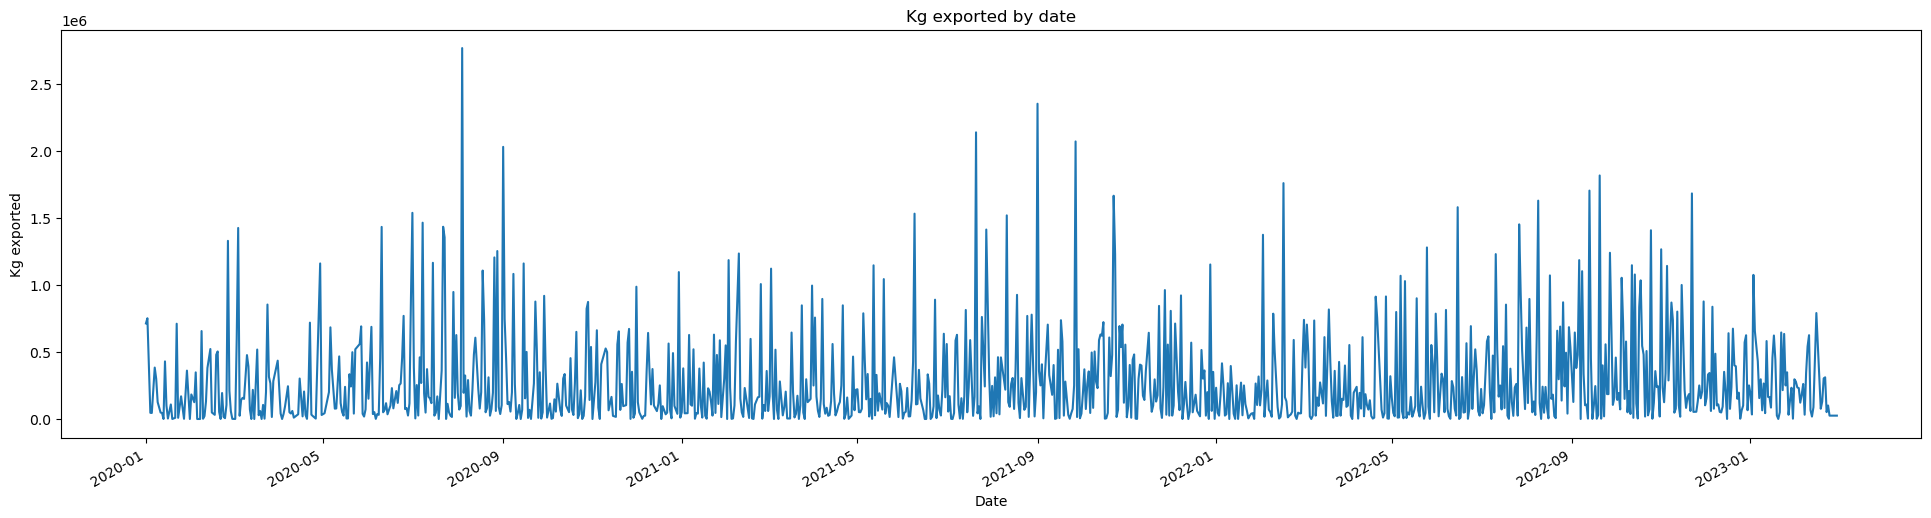

In [135]:
# KG exported (daily)
filter = (df["DCOM"].str.contains(product)) & (df['FEMB']>= '20200101')
df_subset = df[filter].groupby('FEMB')['VPESNET'].sum()
# create a line plot of the counts
plt.figure(figsize=(24, 6))
df_subset.plot(kind='line')
# add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Kg exported')
plt.title('Kg exported by date')
plt.show()

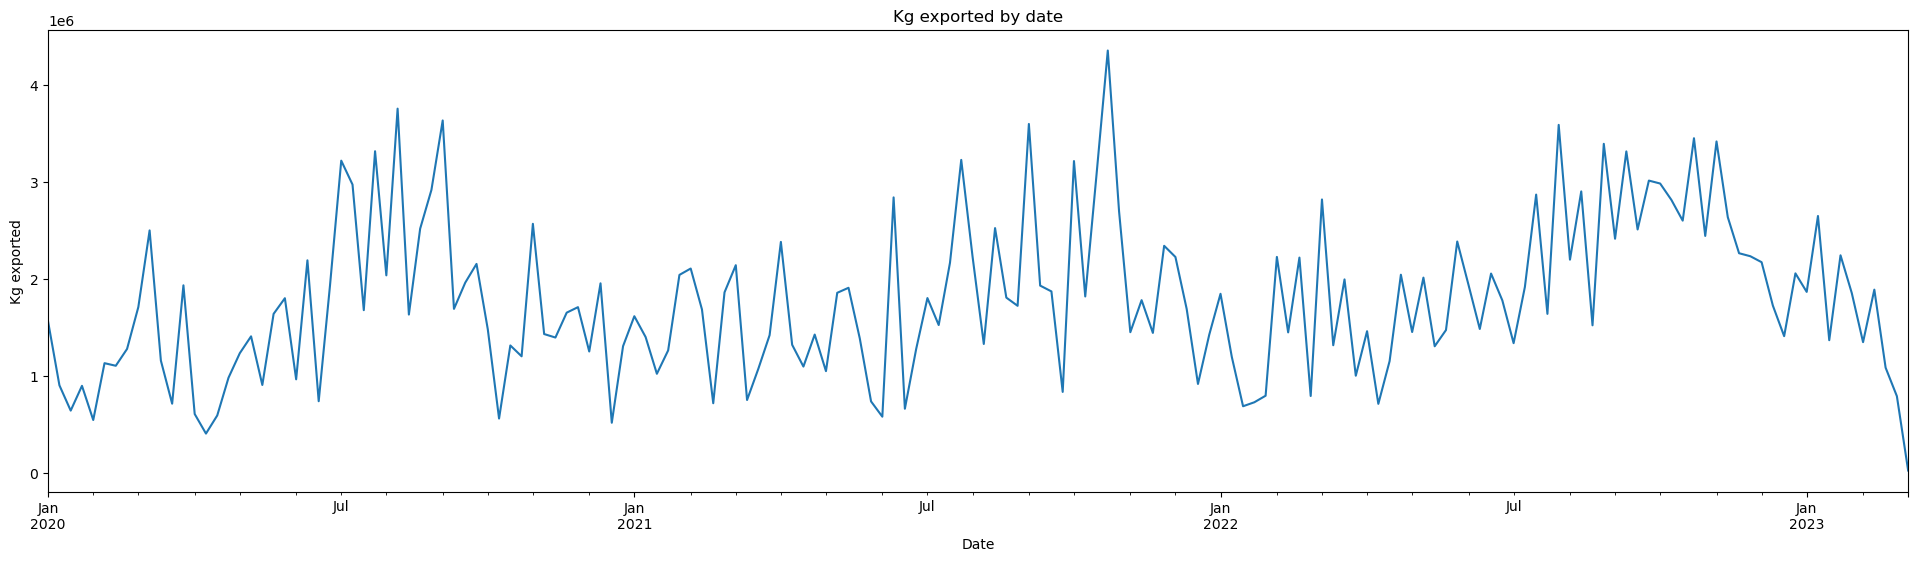

In [136]:
# KG exported (monthly)
filter = (df["DCOM"].str.contains(product)) & (df['FEMB']>= '20200101')
df_subset = df[filter].groupby([pd.Grouper(key='FEMB', freq='W')])['VPESNET'].sum()
# create a line plot of the counts
plt.figure(figsize=(24, 6))
df_subset.plot(kind='line')
# add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Kg exported')
plt.title('Kg exported by date')
plt.show()

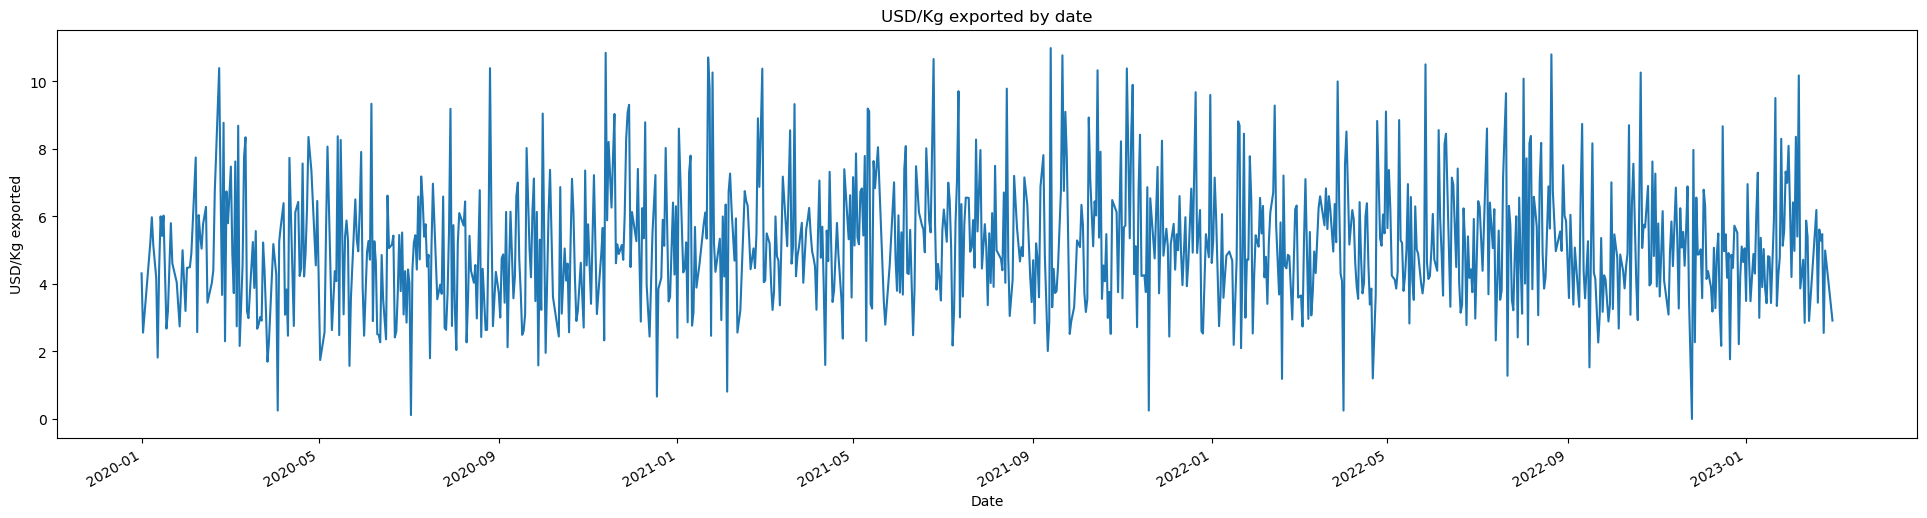

In [137]:
# USDK/Kg exported (daily)
filter = (df["DCOM"].str.contains(product)) & (df['FEMB']>= '20200101')
df['USD_KG'] = df['VFOBSERDOL']/df['VPESNET']
df_subset = df[filter].groupby('FEMB')['USD_KG'].mean()

# calculate the IQR
q1 = df_subset.quantile(0.25)
q3 = df_subset.quantile(0.75)
iqr = q3 - q1

# remove outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df_subset = df_subset[(df_subset > lower_bound) & (df_subset < upper_bound)]

# create a line plot of the counts
plt.figure(figsize=(24, 6))
df_subset.plot(kind='line')
# add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('USD/Kg exported')
plt.title('USD/Kg exported by date')
plt.show()

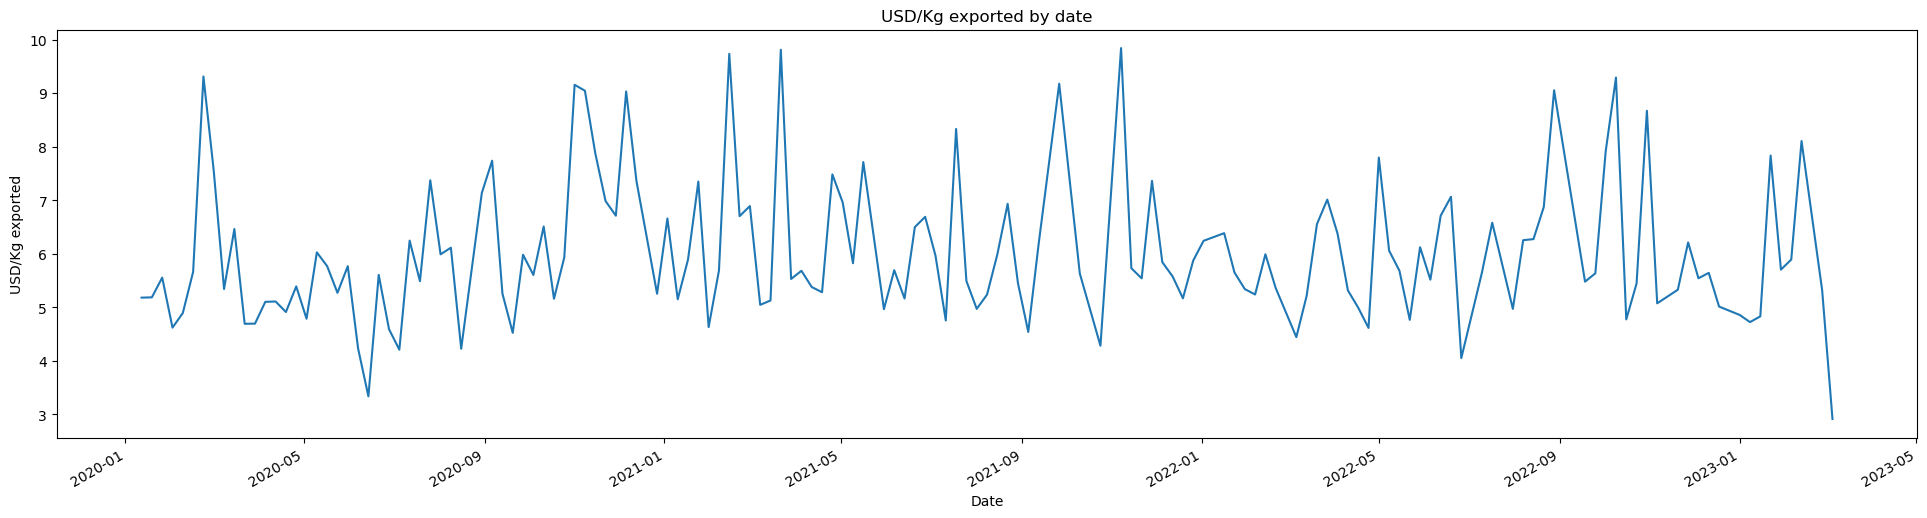

In [138]:
# USDK/Kg exported (daily)
filter = (df["DCOM"].str.contains(product)) & (df['FEMB']>= '20200101')
df['USD_KG'] = df['VFOBSERDOL']/df['VPESNET']
df_subset = df[filter].groupby([pd.Grouper(key='FEMB', freq='W')])['USD_KG'].mean()

# calculate the IQR
q1 = df_subset.quantile(0.25)
q3 = df_subset.quantile(0.75)
iqr = q3 - q1

# remove outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df_subset = df_subset[(df_subset > lower_bound) & (df_subset < upper_bound)]

# create a line plot of the counts
plt.figure(figsize=(24, 6))
df_subset.plot(kind='line')
# add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('USD/Kg exported')
plt.title('USD/Kg exported by date')
plt.show()

In [61]:
df['DCOM'].value_counts()

UVAS FRESCAS                                                                                            22345
PALTAS FRESCAS                                                                                          20513
PALTAS FRESCAS EN CAJAS CONSUMO HUMANO SE ACOGE A DRAWBACK                                              20363
PALTAS FRESCAS EN CAJAS CONSUMO HUMANO VARIEDAD: HASS                                                   11362
MONTURA OFTALMICA CON ESTUCHE                                                                           11171
                                                                                                        ...  
AJOS FRESCOSEMBALAJE: 975 SACOS X 10 KG CADA UNO12 SACOS X 40 KG CADA UNOPARA SU COMERCIALIZACION           1
AJOS ENTEROS NAPURI MEJORADO EN CAJAS                                                                       1
AJOS FRESCOSEN SACOS X 10 KGPARA SU COMERCIALIZACIONCODIGO Nº13 RESTITUCION DE DERECHOS ARANCELARIOS        1
AJOS ENTER

In [ ]:


for file in files:

    x = Dbf5('../data/temporal_landing/x/'+file, codec='latin-1')
    x = x.to_dataframe()
    x.shape

## Extra tables

In [91]:
# NANDINA
with open('../data/temporal_landing/support/NANDINA.TXT', 'r') as f:
    file_lines = f.readlines()
    file_lines = [string.rstrip('\t\n') for string in file_lines][1:]
    file_lines = [string.split('\t') for string in file_lines]
    file_lines = [[element for element in inner_list if element.strip()] for inner_list in file_lines]

nandina =  pd.DataFrame(file_lines)

In [94]:
nandina.sort_values(by=0, ascending=True)

,0,1,2,3,4,5,6,7,8,9
13866,1001101000,- - Para siembra,0,0,0,0,423,0,20020204,20111231
13315,1001101000,TRIGO DURO PARA SIEMBRA,15,18,0,0,421,1110,19010101,19971231
9002,1001101000,- - Para siembra,0,0,0,0,421,0,19980101,20020203
12477,1001109000,- - Los demas,0,0,0,0,511,0,19980101,20020203
13867,1001109000,- - Los demás,0,0,0,0,511,0,20020204,20111231
...,...,...,...,...,...,...,...,...,...,...
24149,9809000040,- Medicamentos para el tratamiento de enfermed...,0,0,0,0,0,0,20201130,99991231
24565,9810000010,- Mercancías hasta por un valor FOB de doscien...,0,0,0,0,0,0,20131231,99991231
22705,9810000020,- Mercancías cuyo valor FOB sea superior a dos...,0,0,0,0,0,0,20131231,99991231
24954,9811000000,- MATERIAL DE GUERRA ...,0,0,0,0,0,0,20220714,99991231


In [97]:
nandina[0] = nandina[0].astype(str).str.zfill(10)

In [114]:
nandina[nandina[0].str.startswith('0802')]

,0,1,2,3,4,5,6,7,8,9
1381,0802120000,"ALMENRAS, FRESCOS O SECOS SIN CASCARA",25,18,0,0,113,1110,19010101,19971231
1382,0802400000,"CASTA¥AS, FRESCOS O SECOS (CASTA¥EA SPP.)",25,18,0,0,111,1110,19010101,19971231
1383,0802500000,"PISTACHOS FRESCOS O SECOS, INCLUSO SIN CASCARA",25,18,0,0,111,1110,19010101,19971231
2307,0802210000,"AVELLANAS, FRESCOS O SECOS (CORYLUS SPP.) CON ...",25,18,0,0,111,1110,19010101,19971231
2308,0802900000,"DEMAS FRUTOS DE CASCARA,FRESCOS/SECOS, INCL.SI...",25,18,0,0,113,1110,19010101,19971231
5875,0802110000,- - Con cascara,0,0,0,0,111,0,19980101,20020203
5876,0802120000,- - Sin cascara,0,0,0,0,113,0,19980101,20020203
5877,0802210000,- - Con cascara,0,0,0,0,111,0,19980101,20020203
5878,0802220000,- - Sin cascara,0,0,0,0,113,0,19980101,20020203
5879,0802310000,- - Con cascara,0,0,0,0,111,0,19980101,20020203
